In [23]:
# Clustering for dataset containing features for wine form 3 different vineyards
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
# Retrieve dataset for clustering
path = 'datasets/'
file = 'wine-clustering.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df.head()
print(df.shape)
print(df.keys())

(178, 13)
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [4]:
# Create a KMeans instance with 3 clusters
n_clusters_pred = 3
kmeans = KMeans(n_clusters=n_clusters_pred)

print('Created kmeans for clustering.')

Created kmeans for clustering.


In [5]:
# Fit the KMeans clustering model to the data
kmeans.fit(df)

print('Fitted kmeans.')

Fitted kmeans.


/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
# Get the cluster labels for each data point,
# these are the labels assigned by kmeans
labels = kmeans.labels_

In [12]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[1.23913043e+01 2.37956522e+00 2.22391304e+00 2.05217391e+01
  8.89130435e+01 2.39086957e+00 2.23869565e+00 3.54782609e-01
  1.64217391e+00 2.89130435e+00 1.03086957e+00 2.85739130e+00
  3.64521739e+02]
 [1.37882353e+01 2.06823529e+00 2.29823529e+00 1.71235294e+01
  1.05764706e+02 2.78176471e+00 2.85058824e+00 2.70000000e-01
  1.81882353e+00 4.98294118e+00 1.04705882e+00 3.31529412e+00
  1.03176471e+03]
 [1.26930769e+01 2.81192308e+00 2.40461538e+00 2.15038462e+01
  9.70384615e+01 1.89461538e+00 1.24423077e+00 3.99230769e-01
  1.29423077e+00 5.10769231e+00 8.51923077e-01 2.19423077e+00
  5.95846154e+02]
 [1.38278571e+01 1.74214286e+00 2.53428571e+00 1.76000000e+01
  1.06214286e+02 2.75928571e+00 2.90500000e+00 3.05714286e-01
  1.77642857e+00 5.93214286e+00 1.11857143e+00 3.00000000e+00
  1.28821429e+03]
 [1.31038889e+01 2.30833333e+00 2.43388889e+00 1.95388889e+01
  1.11611111e+02 2.31444444e+00 1.97888889e+00 3.47222222e-01
  1.67277778e+00 5.38277778e+00 9.09777778e-01 2.72833333e+0

Inertia: 2370689.686782969
Silhouette Score: 0.571138193786884 . Best:1, worst: -1.


/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/

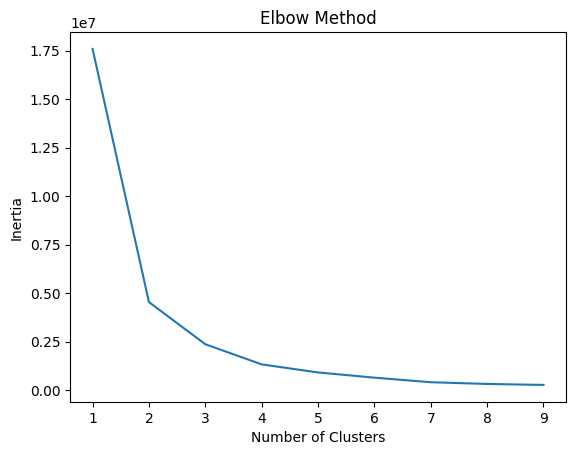

The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.


In [8]:
#evaluate the model

#compare inertia between models or numbers of clusters,
#lower inertia means a better fit.
inertia = kmeans.inertia_
print("Inertia:", inertia)

#silhouette is a metric in which the best value is 1 and the worst is -1
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg,'. Best:1, worst: -1.')

# Elbow method is used for determining the best number of clusters to use,
# the value of k where the curve begins a slower descent is the number of
# clusters that should be used

inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
print('The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.')

/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


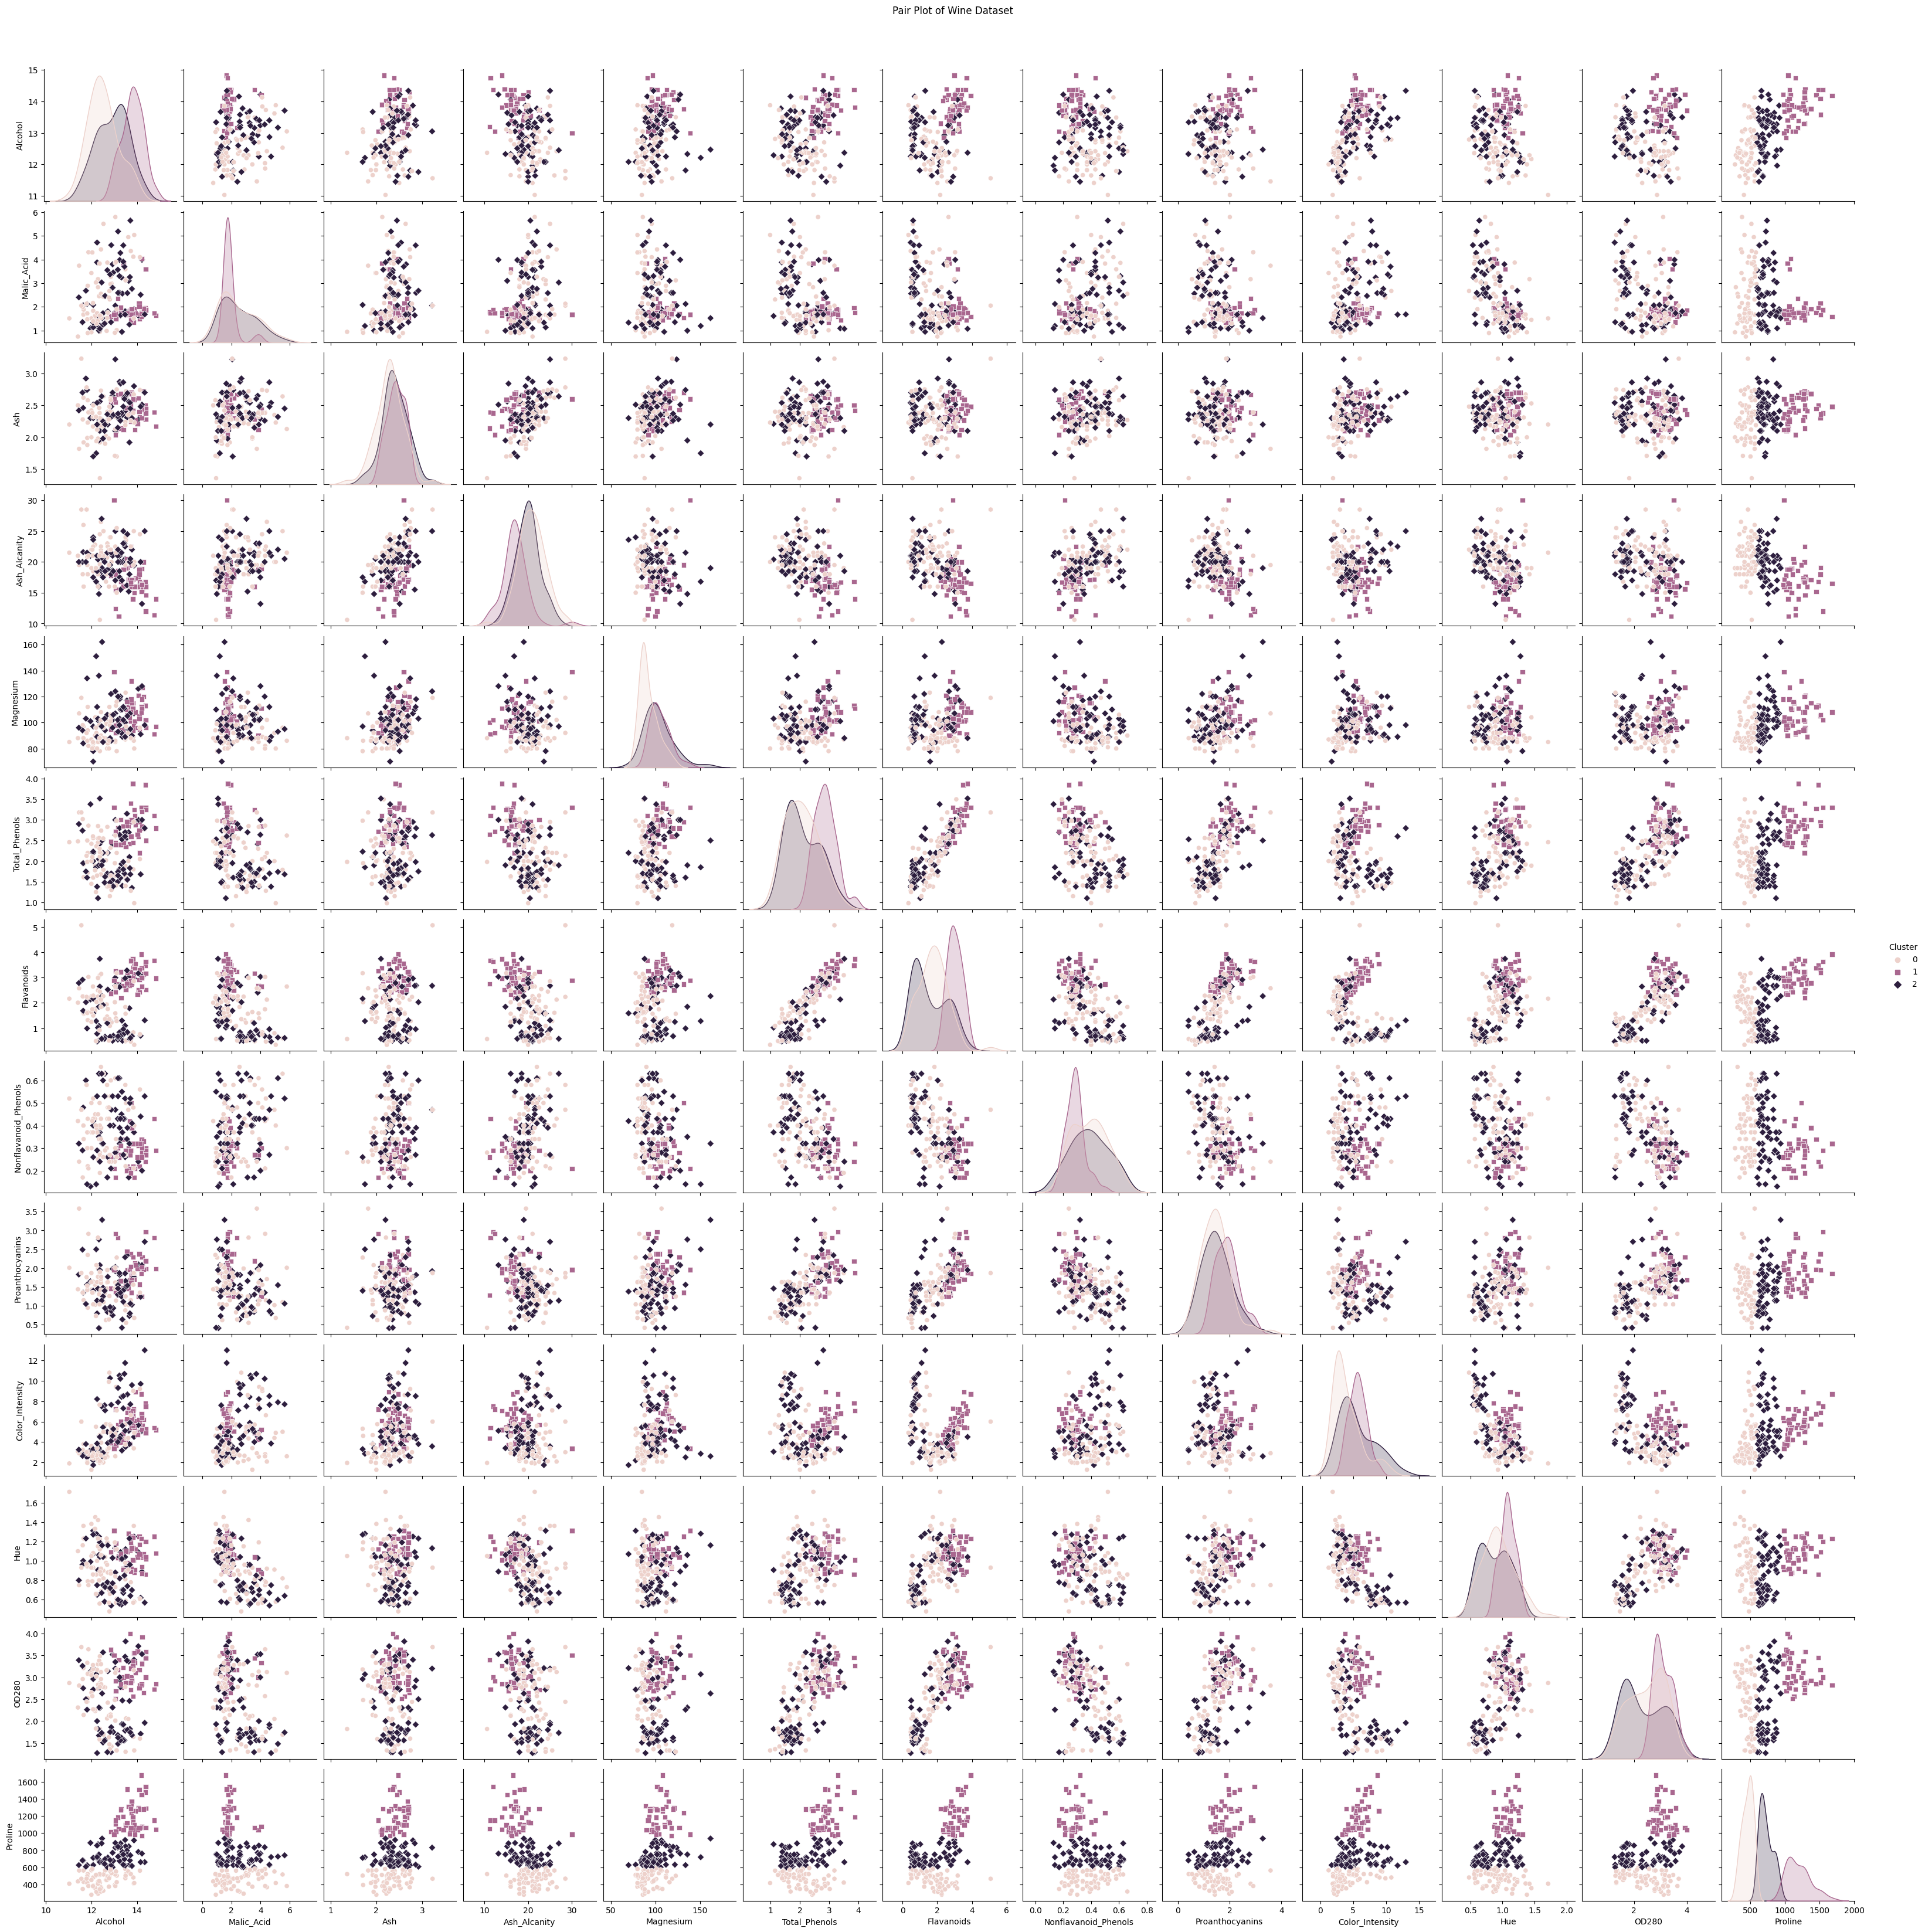

In [9]:
#look for features with a high separation between labels to do a scatter plot

# Create a DataFrame with the data and cluster labels
data = pd.DataFrame(df, columns=df.keys())
data['Cluster'] = labels

# Create pair plots
sns.pairplot(data, hue='Cluster', markers=['o', 's', 'D'])

# Add a title
plt.suptitle("Pair Plot of Wine Dataset", y=1.02)

# Display the plots
plt.show()

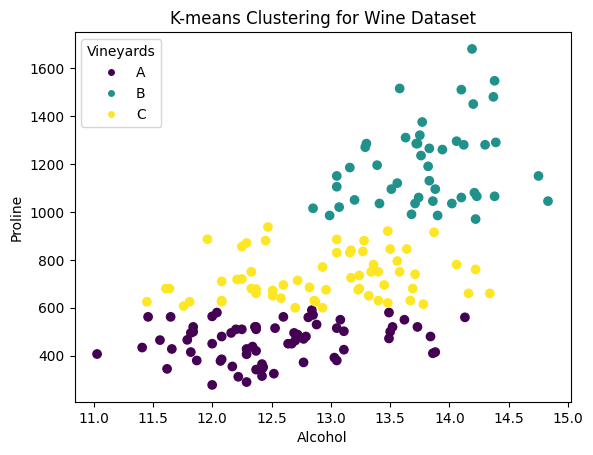

In [22]:
# Visualize the clusters and cluster centers in a pair of variables that provides good separation
scatter = plt.scatter(data['Alcohol'], data['Proline'], c=labels, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('K-means Clustering for Wine Dataset')

# Get unique cluster labels
unique_labels = set(labels)

# Create a dictionary to name the clusters as A, B, C
label_mapping = {0: 'A', 1: 'B', 2: 'C'}

# Create custom legend entries for each cluster
legend_entries = [Line2D([0], [0], marker='o', color='w', label=f'{label_mapping[label]}', 
                         markerfacecolor=scatter.cmap(scatter.norm(label)))
                  for label in unique_labels]

plt.legend(handles=legend_entries, title='Vineyards', loc='upper left')
plt.show()